<a href="https://colab.research.google.com/github/latifahnl/FGA-DS2/blob/main/Regression_Analysis_Room_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset
dataFrame = pd.read_csv("/content/drive/MyDrive/FGA Binar/Exercise Chapter 3 Topic 2: Dataset Gaji.csv")
dataFrame.head(5)

,tahun_berkerja,gaji
0,1,3900000
1,2,4600000
2,3,3700000
3,4,4300000
4,5,3900000


### Data preprocessing

In [4]:
#check the data if there's a NaN value
dataFrame.isna().values.any()

False

In [5]:
#check the features
print(dataFrame.dtypes)

tahun_berkerja    int64
gaji              int64
dtype: object


In [6]:
dataFrame.shape

(20, 2)

In [7]:
# cek data missing
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tahun_berkerja  20 non-null     int64
 1   gaji            20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [8]:
dataFrame.describe()

,tahun_berkerja,gaji
count,20.00000,2.000000e+01
mean,10.50000,5.885000e+06
std,5.91608,1.478005e+06
min,1.00000,3.700000e+06
25%,5.75000,5.200000e+06
50%,10.50000,5.700000e+06
75%,15.25000,6.450000e+06
max,20.00000,9.300000e+06


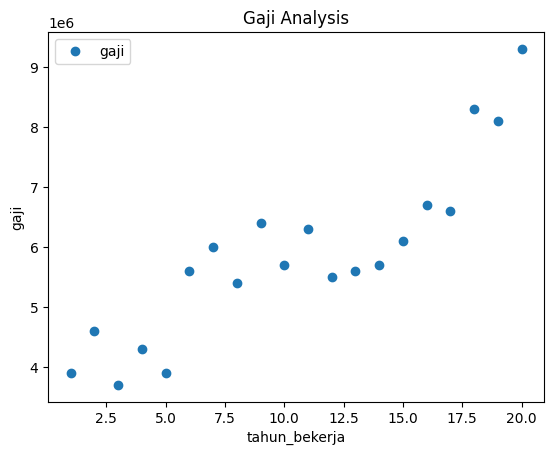

In [9]:
# Visualize gaji
dataFrame.plot(x='tahun_berkerja', y='gaji', style='o')
plt.title('Gaji Analysis')
plt.xlabel('tahun_bekerja')
plt.ylabel('gaji')
plt.show()

In [10]:
#prepare the training set
X = dataFrame.iloc[:, :-1]
y = dataFrame.iloc[:, -1]

In [11]:
#split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## Model

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Data Asli' : y_test, 'Data Predict': y_pred})
df

,Data Asli,Data Predict
0,3900000,3.658046e+06
17,8300000,7.520540e+06
15,6700000,7.066129e+06
1,4600000,3.885251e+06


In [23]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(MAE,MSE)

525573.0659025791 327754078555.68243


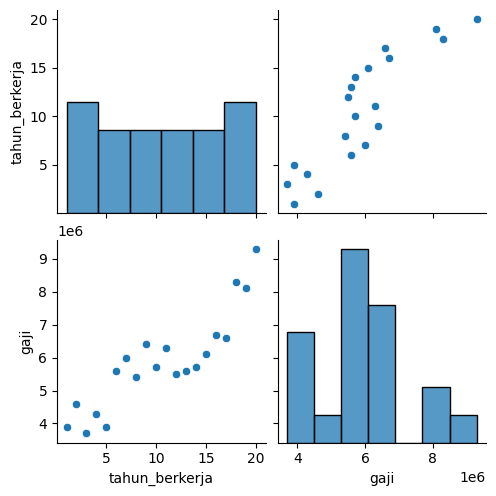

In [18]:
sns.pairplot(dataFrame)

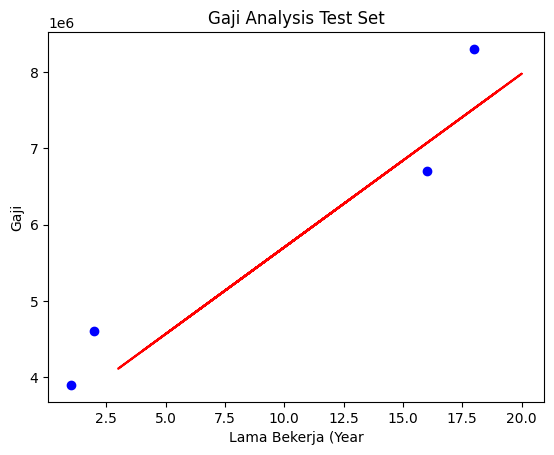

In [19]:
# Visualisasi hasil Test Set
plt.scatter(X_test, y_test, color ='blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title ('Gaji Analysis Test Set')
plt.xlabel('Lama Bekerja (Year')
plt.ylabel('Gaji')
plt.show()

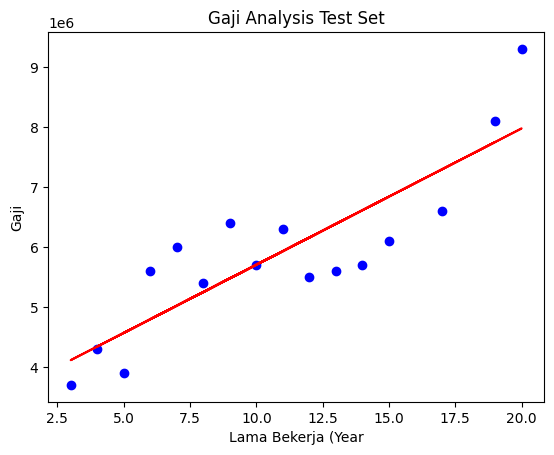

In [20]:
# Visualisasi hasil Train Set
plt.scatter(X_train, y_train, color ='blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title ('Gaji Analysis Test Set')
plt.xlabel('Lama Bekerja (Year')
plt.ylabel('Gaji')
plt.show()